<a href="https://colab.research.google.com/github/Shiladitya56/Machine-Learning/blob/main/SEM2/random/DecPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [91]:
df = pd.read_csv('/content/drive/MyDrive/ipynb/sem2/datasets/car_evaluation.csv',\
                 header=None)
df.columns =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [92]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [93]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
df = encoder.fit_transform(df)

In [94]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,1,1,1,1,unacc
1,1,1,1,1,1,2,unacc
2,1,1,1,1,1,3,unacc
3,1,1,1,1,2,1,unacc
4,1,1,1,1,2,2,unacc
...,...,...,...,...,...,...,...
1723,4,4,4,3,2,2,good
1724,4,4,4,3,2,3,vgood
1725,4,4,4,3,3,1,unacc
1726,4,4,4,3,3,2,good


In [95]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,1.750000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000
75%,3.250000,3.250000,3.250000,3.000000,3.000000,3.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000


In [96]:
x = df.drop(['class'], axis=1)
y = df['class']

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [98]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [99]:
y_pred = model.predict(x_test)

In [100]:
print(f'Model accuracy score: {accuracy_score(y_test, y_pred)*100:.1f}%')

Model accuracy score: 79.0%


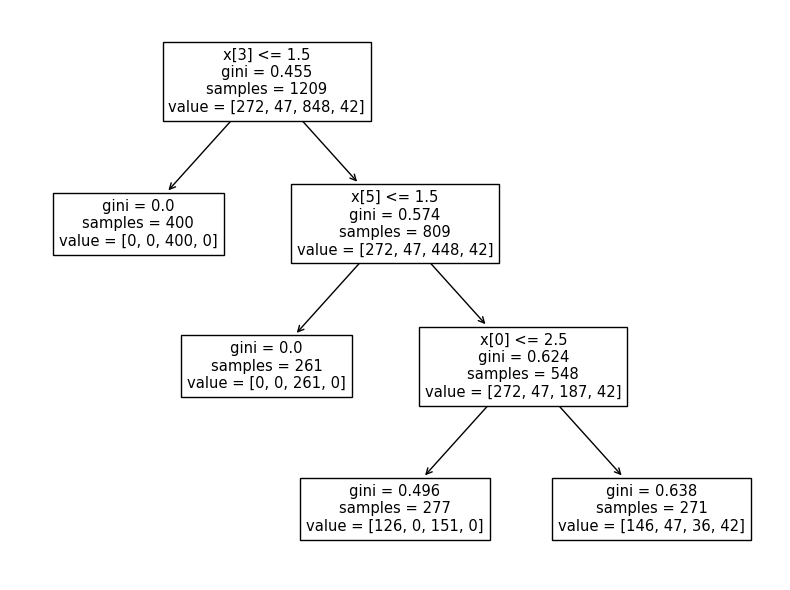

In [101]:
pt.figure(figsize=(8,6))
tree.plot_tree(model.fit(x_train, y_train))
pt.tight_layout();

In [102]:
x = StandardScaler().fit_transform(x)

In [103]:
pca = PCA(n_components=2)
pcs = pca.fit_transform(x)
pcdf = pd.DataFrame(data = pcs, columns = ['pc1', 'pc2'])

In [104]:
pcdf = pd.concat([pcdf, y], axis = 1)

In [105]:
pcdf

,pc1,pc2,class
0,0.202198,1.341641,unacc
1,-0.506724,1.341641,unacc
2,-1.215647,1.341641,unacc
3,0.612247,1.341641,unacc
4,-0.096675,1.341641,unacc
...,...,...,...
1723,0.096675,-1.341641,good
1724,-0.612247,-1.341641,vgood
1725,1.215647,-1.341641,unacc
1726,0.506724,-1.341641,good


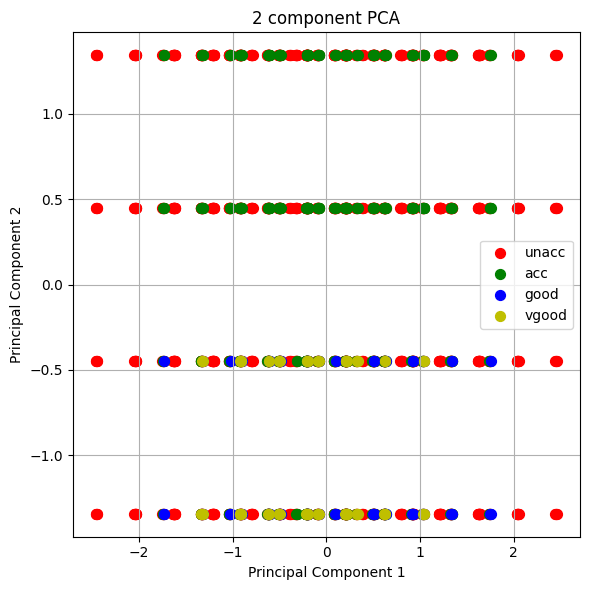

In [106]:
fig = pt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 component PCA')

targets = ['unacc', 'acc', 'good', 'vgood']
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
  when = pcdf['class'] == target
  ax.scatter(pcdf.loc[when, 'pc1'],pcdf.loc[when, 'pc2'],c = color,s = 50)
ax.legend(targets)
ax.grid()
pt.tight_layout();

In [107]:
encoder = ce.OrdinalEncoder(cols=['class'])
pcdf = encoder.fit_transform(pcdf)

In [108]:
x = pcdf.drop(['class'], axis=1)
y = pcdf['class']

In [109]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [110]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [111]:
y_pred = model.predict(x_test)

In [112]:
print(f'Model accuracy score: {accuracy_score(y_test, y_pred)*100:.1f}%')

Model accuracy score: 70.7%


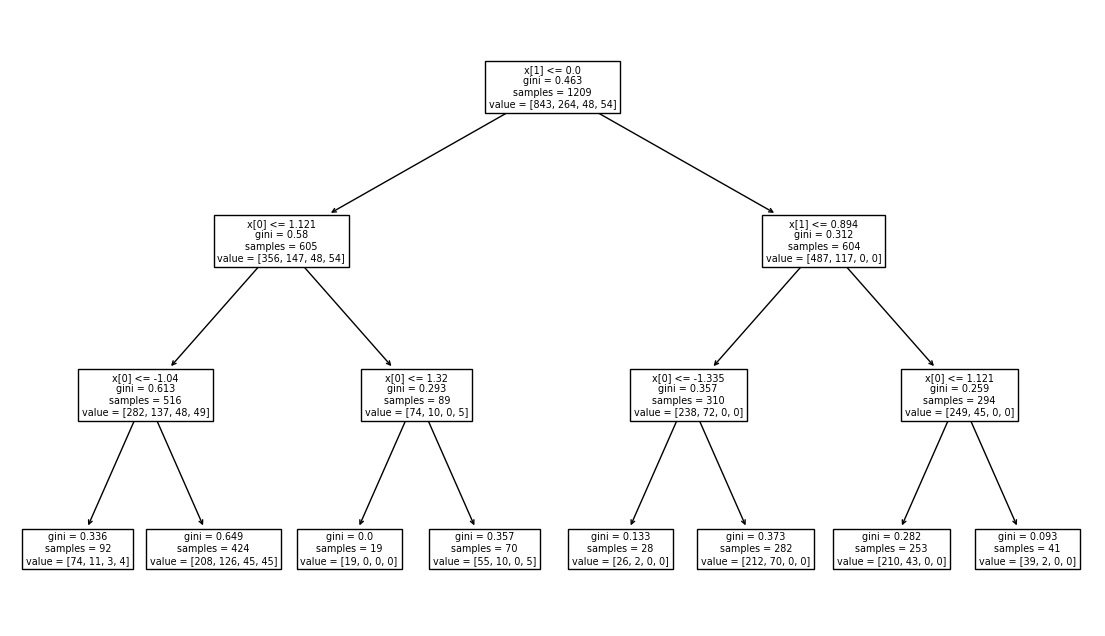

In [113]:
pt.figure(figsize=(14,8))
tree.plot_tree(model.fit(x_train, y_train));